In [135]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [136]:
with open("article.txt") as article:
    text = article.read()


In [137]:
tokenized_text = word_tokenize(text)

print("Words count: {}".format(len(tokenized_text)))


Words count: 975


In [138]:
filtered_words = [
    word for word in tokenized_text if word not in stopwords.words('english')]

print("Words count: {}".format(len(filtered_words)))


Words count: 596


In [139]:
added_words = stopwords.words("english")

added_words.append("'s")
added_words.append("'no")
added_words.append("'")
added_words.append(",")
added_words.append("3-0")
added_words.append(".")
added_words.append('``')
added_words.append("''")
added_words.append("n`t")
added_words.append("n't")

filtered_words = [
    word for word in tokenized_text if word not in added_words]

print("Words count: {}".format(len(filtered_words)))


Words count: 491


In [140]:
lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

print("Words count: {}".format(len(lemmatized_words)))


Words count: 491


In [141]:
counted_words = Counter(lemmatized_words)

top10words = counted_words.most_common(10)


Text(0.5, 1.0, 'Count of words in article')

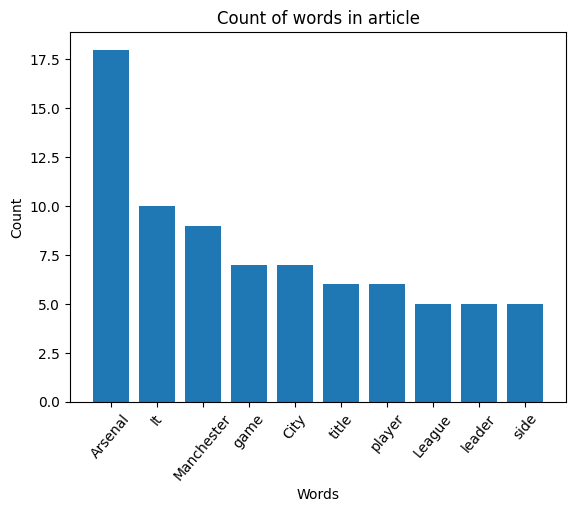

In [142]:
plt.bar(*zip(*top10words))
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation=50)
plt.title("Count of words in article")


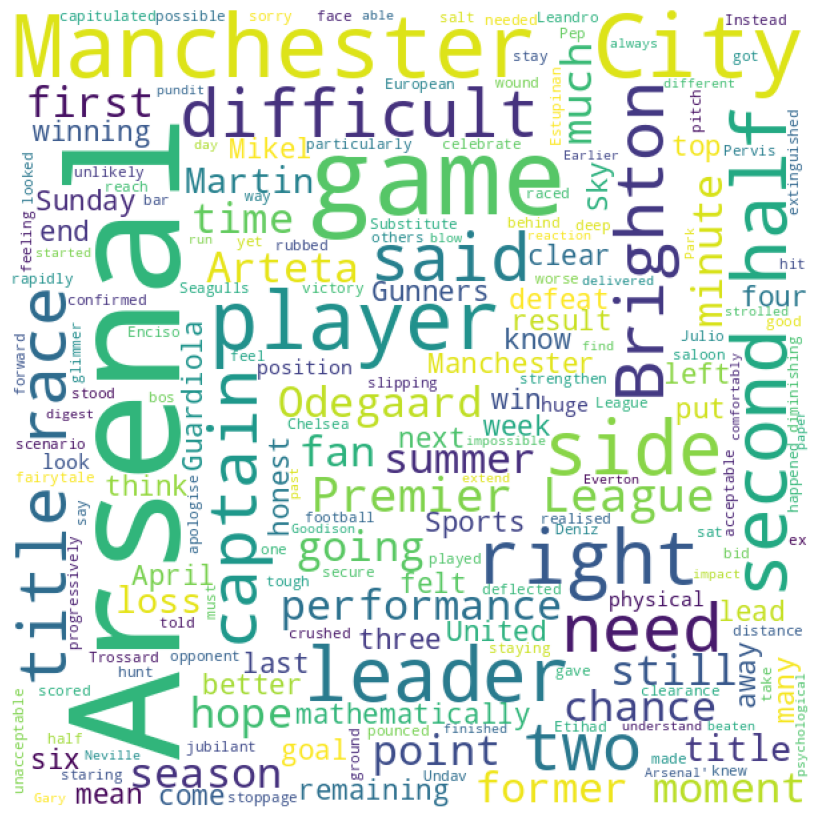

In [143]:
wordcloud = WordCloud(width=600, height=600,
                      background_color='white',
                      min_font_size=10).generate(" ".join(lemmatized_words))

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()
